<a href="https://colab.research.google.com/github/Sqrrt/quantum_algorhitms/blob/main/%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.0 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0a401c7312e026b648bc92825b4e335877b06dc3d7dfad46a67603b48e2e05c6
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import qiskit
from pylatexenc import *

In [ ]:
import qiskit
from pylatexenc import *
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import QasmSimulator, AerSimulator
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math
from fractions import Fraction
from math import gcd
from qiskit.compiler import assemble
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

In [ ]:
#квантовые состояния после измерения реально случайны
simulator = QasmSimulator()
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])

compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(compiled_circuit)

print(f"Number of '00': {counts['00']}")
print(f"Number of '11': {counts['11']}")

Number of '00': 491
Number of '11': 509


In [ ]:
#матрица паули x реально работает, все кубиты вначале реально в нулях
circuit2 = QuantumCircuit(1,1)
circuit2.x(0)
#circuit2.x(0)
circuit2.measure(0,0)

backend = QasmSimulator()
qobj = transpile(circuit2, backend)
r = backend.run(qobj,shots=8)
r = r.result()
print (str(r.get_counts(qobj)))

{'1': 8}


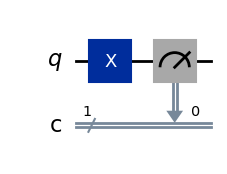

In [ ]:
circuit2.draw("mpl")

In [ ]:
#генератор случайных чисел от 0 до 2^n
def random_generator(n):
  circuit3 = QuantumCircuit(n,n)
  for i in range(n):
    circuit3.h(i)
  for i in range(n):
    circuit3.measure(i, i)
  compiled_circuit3 = transpile(circuit3, simulator)
  job = simulator.run(compiled_circuit3, shots=1000)
  result = job.result()
  counts = result.get_counts(compiled_circuit3)
  bits = ""
  shots=1024
  for v in counts.values():
    if v > shots/(2**n) :
      bits += "1"
    else:
      bits += "0"
  return int(bits,2), circuit3
size = 10
qubits = 4
numbers = []
for i in range(size):
  n = random_generator(qubits)[0]
  numbers.append(n)
print ("list=" + str(numbers))

list=[2393, 18672, 6937, 44297, 9996, 25828, 36056, 6580, 33927, 33080]


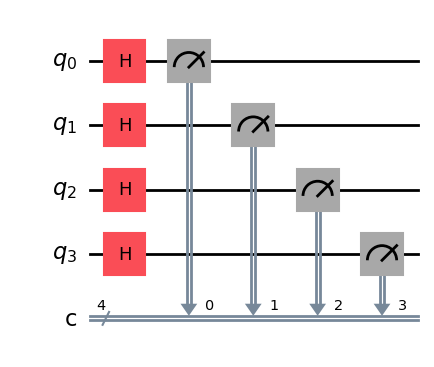

In [ ]:
random_generator(qubits)[1].draw("mpl")

In [ ]:
#сверплотное кодирование
def densitycoding(first,second):
  #белл пара
  circuit = QuantumCircuit(2,2)
  circuit.h(0)
  circuit.cx(0,1)

  #алиса
  if(first == 1):
    circuit.x(0)
  if(second == 1):
    circuit.z(0)
  circuit.barrier()
  #боб
  circuit.cx(0,1)
  circuit.h(0)

  circuit.measure([0,1], [0,1])
  compiled_circuit = transpile(circuit, simulator)
  job = simulator.run(compiled_circuit, shots=100)
  result = job.result()
  counts = result.get_counts(compiled_circuit)
  print(counts)
  return circuit

{'10': 100}


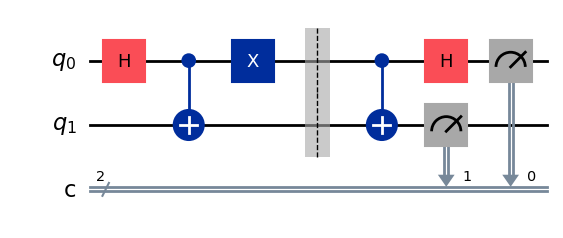

In [ ]:
simulator = QasmSimulator()
cir = densitycoding(1,0)
cir.draw("mpl")

In [ ]:
#Квантовая телепортация
def quantum_teleportation():
  circuit = QuantumCircuit(3,3)
  #белл пара
  circuit.h(1)
  circuit.cx(1,2)

  #алиса
  circuit.ry(np.pi/4, 0)
  circuit.cx(0,1)
  circuit.h(0)
  circuit.barrier()

  circuit.measure(0, 0)
  circuit.measure(1, 1)
  #боб
  circuit.z(2).c_if(0, 1)
  circuit.x(2).c_if(1, 1)

  circuit.measure(2, 2)

  compiled_circuit = transpile(circuit, simulator)
  job = simulator.run(compiled_circuit, shots=100)
  result = job.result()
  counts = result.get_counts(compiled_circuit)
  print(counts)

  alice = {}
  alice['00'] = counts['000'] + counts['100']
  alice['10'] = counts['010'] + counts['110']
  alice['01'] = counts['001'] + counts['101']
  alice['11'] = counts['011'] + counts['111']
  histalice = plot_histogram(alice)
  histalice.savefig('histalice.png')

  bob = {}
  bob['0'] = counts['000'] + counts['010'] + counts['001'] + counts['011']
  bob['1'] = counts['100'] + counts['110'] + counts['101'] + counts['111']
  histbob = plot_histogram(bob)
  histbob.savefig('histbob.png')
  return circuit

{'100': 3, '010': 21, '000': 14, '110': 4, '101': 3, '001': 23, '111': 3, '011': 29}


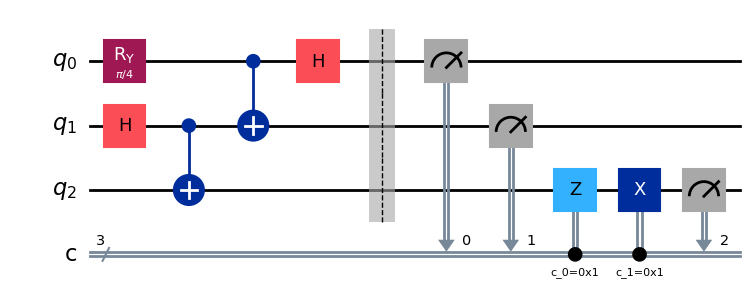

In [ ]:
circuit = quantum_teleportation()
circuit.draw("mpl")

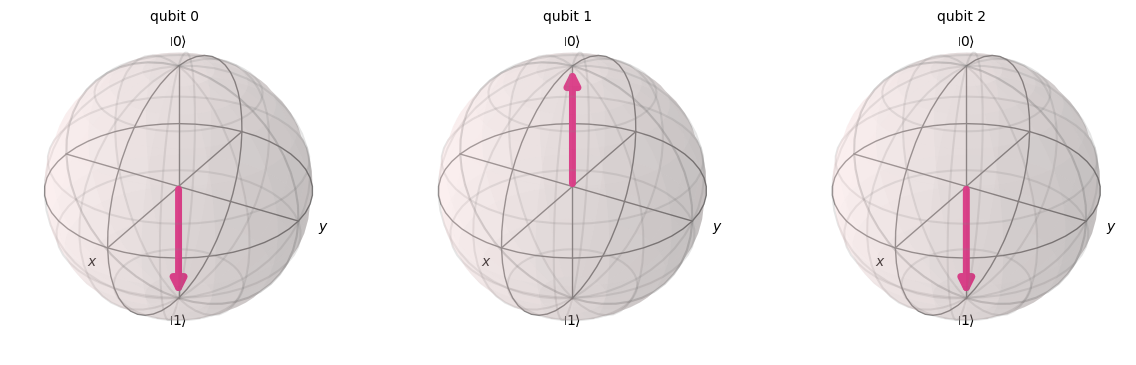

In [ ]:
#квантовое преобразование Фурье
def step(circuit,n):
  if(n == 0):
    return circuit
  n -= 1
  circuit.h(n)
  for q in range(n):
    circuit.cp(np.pi/(2**(n-q)), q,n)
  step(circuit,n)
def swap(circuit, n):
  for q in range(n//2):
    circuit.swap(q, n-q-1)
  return circuit
def fourier(circuit,n):
  step(circuit,n)
  swap(circuit,n)
  return circuit
simulator = QasmSimulator()
qc = QuantumCircuit(3)

#101
qc.x(0)
qc.x(2)
qc.draw()

qc_init = qc.copy()
qc_init.save_statevector()
res = simulator.run(qc_init).result()
st_vec = res.get_statevector()
plot_bloch_multivector(st_vec)

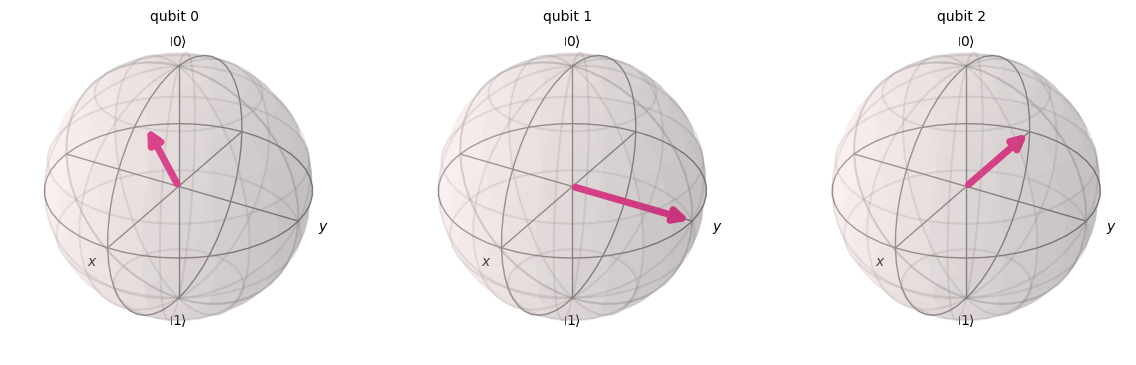

In [ ]:
qc = fourier(qc,3)
qc.save_statevector()
res2 = simulator.run(qc).result()
st_vec2 = res2.get_statevector(qc)
plot_bloch_multivector(st_vec2)

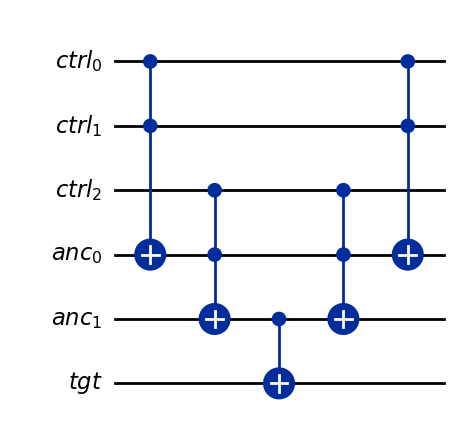

In [ ]:
#элемент Тоффоли
def toffoli(n):
  ctrl = QuantumRegister(n, 'ctrl')
  anc = QuantumRegister(n-1, 'anc')
  tgt = QuantumRegister(1, 'tgt')

  circ = QuantumCircuit(ctrl, anc, tgt,name='Toffoli')
  circ.ccx(ctrl[0], ctrl[1], anc[0])
  for i in range(2, n):
      circ.ccx(ctrl[i], anc[i-2], anc[i-1])
  circ.cx(anc[n-2], tgt[0])
  for i in range(n-1, 1, -1):
      circ.ccx(ctrl[i], anc[i-2], anc[i-1])
  circ.ccx(ctrl[0], ctrl[1], anc[0])

  return circ
c1 = toffoli(3)
c1.draw("mpl")

In [ ]:
#маркируем состояния-результаты (как хотим)
def oracle_ex3(n):
  qc = QuantumCircuit(n)
  #вот тут --------
  #for i in range(n-1):
  qc.cz(1,n-1)
  #----------------
  oracle_ex3 = qc.to_gate()
  oracle_ex3.name = "U$_\omega$"
  return oracle_ex3

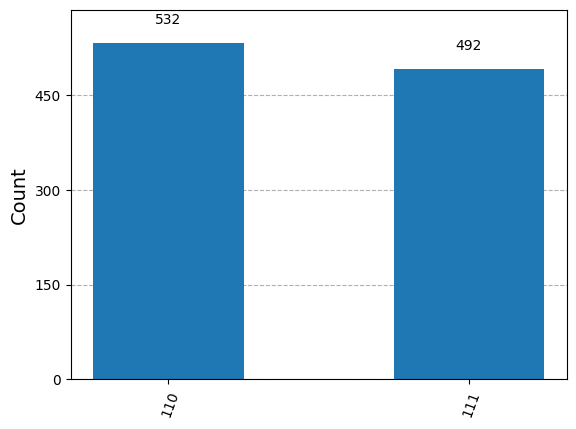

In [ ]:
def diffuser(qubits):
    qc = QuantumCircuit(qubits)
    for qubit in range(qubits):
        qc.h(qubit)
    for qubit in range(qubits):
        qc.x(qubit)
    qc.h(qubits-1)
    qc.mcx(list(range(qubits-1)), qubits-1)#mcx - "мультикрановое" Тоффоли, можно еще mcmt, там несколько управляющих и управляемых кубитов
    qc.h(qubits-1)
    for qubit in range(qubits):
        qc.x(qubit)
    for qubit in range(qubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc
def grover(n):
  grover_circuit = QuantumCircuit(n)
  a = [i for i in range(n)]
  grover_circuit = initialize_s(grover_circuit, a)
  grover_circuit.append(oracle_ex3(n), a)
  grover_circuit.append(diffuser(n), a)
  return grover_circuit
c2 = grover(3)
c2.measure_all()
backend = QasmSimulator()
compiled_circuit = transpile(c2, backend)
job = backend.run(compiled_circuit, shots=1024)
hist = job.result().get_counts()
plot_histogram(hist)

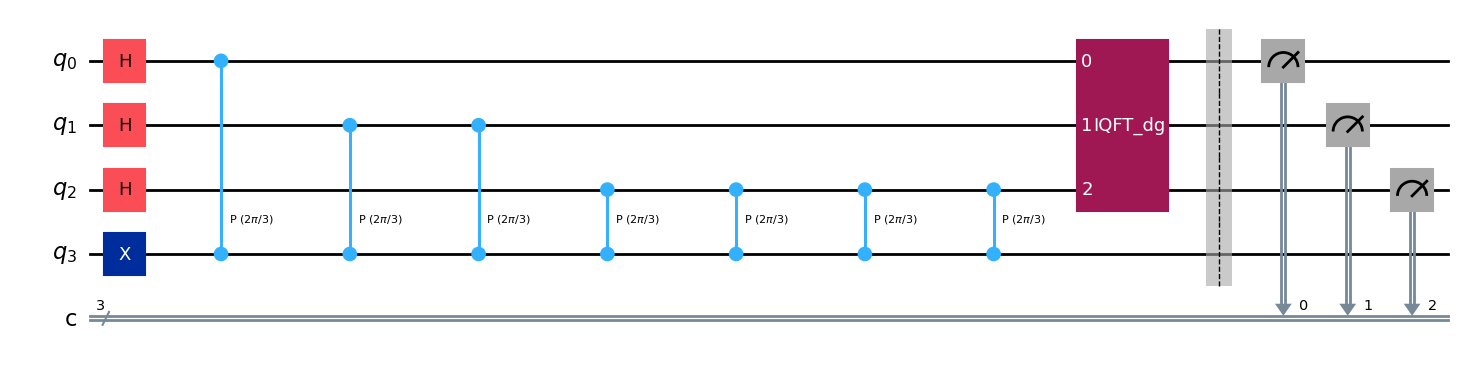

In [ ]:
#фазовая оценка
def phase_est(n):
  qpe3 = QuantumCircuit(n, n-1)
  for qubit in range(n-1):
      qpe3.h(qubit)
  qpe3.x(n-1)
  angle = 2*math.pi/3
  repetitions = 1
  for counting_qubit in range(n-1):
      for i in range(repetitions):
          qpe3.cp(angle, counting_qubit, n-1);
      repetitions *= 2

  qpe3 = qpe3.compose(QFT(n-1, inverse=True), range(n-1))

  qpe3.barrier()
  for k in range(n-1):
      qpe3.measure(k,k)

  qpe3.draw()
  return qpe3
aer_sim = AerSimulator()
shots = 4096
qpe3 = phase_est(4)
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)
qpe3.draw("mpl")

In [ ]:
def c_amodN(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc
def qpe_amodN(a,N):
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amodN(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # Simulate Results
    aer_sim = AerSimulator()
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase
N = 15
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amodN(a,15) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
Register Reading: 11000000
Corresponding Phase: 0.75
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***


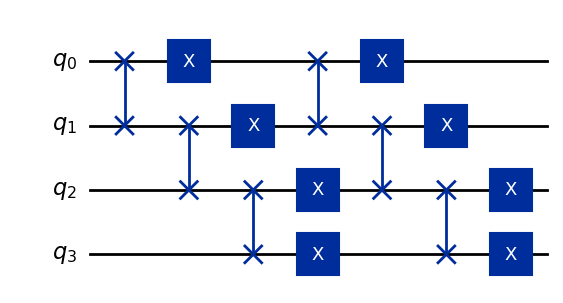

In [ ]:
a = 7
power = 2
if a not in [2,4,7,8,11,13]:
    raise ValueError("'a' must be 2,4,7,8,11 or 13")
U = QuantumCircuit(4)
for _iteration in range(power):
    if a in [2,13]:
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
    if a in [7,8]:
        U.swap(0,1)
        U.swap(1,2)
        U.swap(2,3)
    if a in [4, 11]:
        U.swap(1,3)
        U.swap(0,2)
    if a in [7,11,13]:
        for q in range(4):
            U.x(q)
U.draw("mpl")
#U = U.to_gate()
#U.name = f"{a}^{power} mod 15"
#c_U = U.control()

In [ ]:
#я нихуя не понимаю как работает эта хуйня бляяяяяяяяяяяяяя (квантовый поиск)
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

one_step_circuit = QuantumCircuit(6, name=' ONE STEP')
#монетка
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction()
one_step_circuit.draw()

inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

inv_qft_gate = QFT(4, inverse=True).to_instruction()
qft_gate = QFT(4, inverse=False).to_instruction()

QFT(4, inverse=True).decompose()

phase_circuit =  QuantumCircuit(6, name=' phase oracle ')
#1001
phase_circuit.x(1)
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mcx([0,1,2], 3)
phase_circuit.h(3)
phase_circuit.x(2)
phase_circuit.x(1)
#1011
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mcx([0,1,2],3)
phase_circuit.h(3)
phase_circuit.x(2)
phase_oracle_gate = phase_circuit.to_instruction()
#oracle
phase_oracle_circuit =  QuantumCircuit(11, name=' PHASE ORACLE CIRCUIT ')
phase_oracle_circuit.append(phase_oracle_gate, [4,5,6,7,8,9])

mark_auxiliary_circuit = QuantumCircuit(5, name=' mark auxiliary ')
mark_auxiliary_circuit.x([0,1,2,3,4])
mark_auxiliary_circuit.mcx([0,1,2,3], 4)
mark_auxiliary_circuit.z(4)
mark_auxiliary_circuit.mcx([0,1,2,3], 4)
mark_auxiliary_circuit.x([0,1,2,3,4])

mark_auxiliary_gate = mark_auxiliary_circuit.to_instruction()

phase_estimation_circuit = QuantumCircuit(11, name=' phase estimation ')
phase_estimation_circuit.h([0,1,2,3])
for i in range(0,4):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(cont_one_step, [i,4,5,6,7,8,9])

phase_estimation_circuit.append(inv_qft_gate, [0,1,2,3])
phase_estimation_circuit.append(mark_auxiliary_gate, [0,1,2,3,10])
phase_estimation_circuit.append(qft_gate, [0,1,2,3])

for i in range(3,-1,-1):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(inv_cont_one_step, [i,4,5,6,7,8,9])
phase_estimation_circuit.barrier(range(0,10))
phase_estimation_circuit.h([0,1,2,3])

phase_estimation_gate = phase_estimation_circuit.to_instruction()

In [ ]:
theta_q = QuantumRegister(4, 'theta')
node_q = QuantumRegister(4, 'node')
coin_q = QuantumRegister(2, 'coin')
auxiliary_q = QuantumRegister(1, 'auxiliary')
creg_c2 = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(theta_q, node_q, coin_q, auxiliary_q, creg_c2)
circuit.h([4,5,6,7,8,9])
iterations = 2

for i in range(0,iterations):
    circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
    circuit.append(phase_estimation_gate, [0,1,2,3,4,5,6,7,8,9,10])

circuit.measure(node_q[0], creg_c2[0])
circuit.measure(node_q[1], creg_c2[1])
circuit.measure(node_q[2], creg_c2[2])
circuit.measure(node_q[3], creg_c2[3])
circuit.draw()

backend = QasmSimulator()
compiled_circuit = transpile(circuit, backend)
job = backend.run(compiled_circuit, shots=1000)
hist = job.result().get_counts()
circuit.draw("mpl")